**Central Limit Theorem**

In [52]:
#importing libraries

import numpy as np
import pandas as pd
import os
import seaborn as sns

In [3]:
#upload dataset

test_df = pd.read_csv('/content/test.csv')
train_df = pd.read_csv('/content/train.csv')

In [8]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
#Concat both the dataset and shuffle the data
df = pd.concat([train_df.drop(columns=['Survived']),test_df]).sample(1309)

In [11]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
485,486,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S
471,472,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S
291,292,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C
385,1277,2,"Herman, Miss. Kate",female,24.0,1,2,220845,65.0000,NaN,S
809,810,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.1000,E8,S


<Axes: ylabel='Density'>

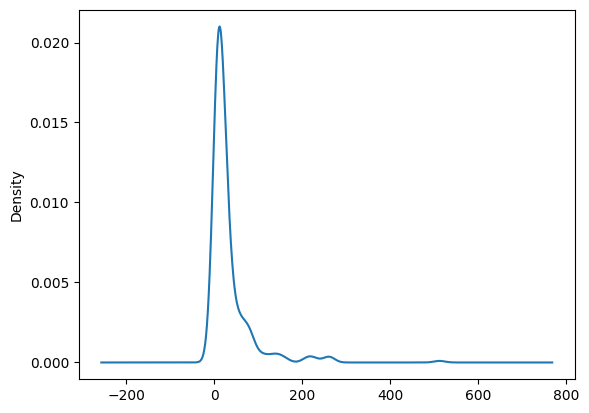

In [14]:
# Fare distribution is skewed, so direct mean may be misleading

df['Fare'].plot(kind='kde')

In [33]:
#sample size = 50 -- number of sample = 100times

samples = []
for i in range(100):
  samples.append(df['Fare'].dropna().sample(50).values.tolist())


In [ ]:
# Applying Central Limit Theorem:
# Taking multiple random samples to observe sampling distribution of mean

In [34]:
samples = np.array(samples)

In [39]:
samples

array([[ 78.85  ,  13.    ,  73.5   , ...,  26.    ,  79.65  ,   7.775 ],
       [  3.1708,   6.75  ,  14.5   , ...,  51.8625,   7.25  ,   7.775 ],
       [  8.05  ,   0.    ,   7.775 , ...,   6.4375,  51.8625, 134.5   ],
       ...,
       [  7.7958,  30.5   , 151.55  , ...,  15.2458,  77.2875,  13.    ],
       [ 13.    ,  30.    ,   7.775 , ...,   6.75  ,   7.775 ,  14.5   ],
       [ 30.    ,   7.75  ,  23.45  , ...,  25.4667,  91.0792,  83.1583]])

In [36]:
sampling_means = samples.mean(axis=1)

<Axes: ylabel='Density'>

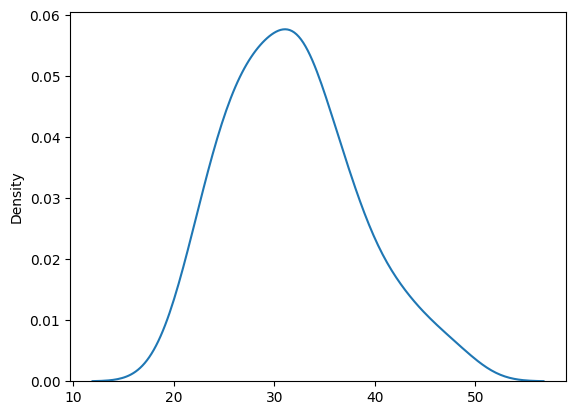

In [37]:
sns.kdeplot(sampling_means)

In [38]:
sampling_means.mean()

np.float64(31.783884020000002)

In [41]:
#std
sampling_means.std()/np.sqrt(50)

np.float64(0.9030190957788669)

In [44]:
lower_limit = sampling_means.mean()-2*sampling_means.std()/np.sqrt(50)
upper_limit = sampling_means.mean()+2*sampling_means.std()/np.sqrt(50)

In [46]:
print('The range is', lower_limit, '-' , upper_limit)

The range is 29.97784582844227 - 33.589922211557734
